In [0]:
#import libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [2]:
#First Dataset: Haberman's Survival - small size
#1 = the patient survived 5 years or longer, 2 = the patient died within 5 years(column 3)
haberman = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)
print(haberman.head())
print(haberman.shape)

    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1
(306, 4)


In [0]:
y=haberman[3]
haberman=haberman.copy()
del haberman[3]
X=haberman

In [75]:
print('class 1: ',np.count_nonzero(y==1))
print('class 2: ',np.count_nonzero(y==2))

class 1:  225
class 2:  81


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100) # 70% training and 30% test

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

import time

start_rf = time.clock()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_cancer_pred=clf_cancer.predict(X_cancer_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

end_rf=time.clock()

print("-----Random Forest, without distillation-------")
print("running time: ",end_rf - start_rf)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy, without distillation
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

#CV Score, without distillation
print('cv_score: ',cross_val_score(clf, X_train, y_train, cv=5).mean())

-----Random Forest, without distillation-------
running time:  0.9144070000000002
Accuracy:  0.7391304347826086
cv_score:  0.6618644920970502


In [9]:
#probability
pro=clf.predict_proba(X)
pro

array([[0.99191667, 0.00808333],
       [0.952     , 0.048     ],
       [0.98455   , 0.01545   ],
       [0.997     , 0.003     ],
       [0.953     , 0.047     ],
       [0.908     , 0.092     ],
       [0.994     , 0.006     ],
       [0.933     , 0.067     ],
       [0.339     , 0.661     ],
       [0.83      , 0.17      ],
       [0.984     , 0.016     ],
       [0.921     , 0.079     ],
       [0.821     , 0.179     ],
       [0.991     , 0.009     ],
       [0.8765    , 0.1235    ],
       [0.95983333, 0.04016667],
       [0.996     , 0.004     ],
       [0.92      , 0.08      ],
       [0.997     , 0.003     ],
       [0.96283333, 0.03716667],
       [0.99425   , 0.00575   ],
       [0.972     , 0.028     ],
       [0.898     , 0.102     ],
       [0.96283333, 0.03716667],
       [0.28      , 0.72      ],
       [0.992     , 0.008     ],
       [0.99033333, 0.00966667],
       [0.99033333, 0.00966667],
       [0.948     , 0.052     ],
       [0.98033333, 0.01966667],
       [0.

In [10]:
hist=np.histogram(pro, bins=10)
hist

(array([135,  60,  59,  33,  19,  19,  33,  59,  60, 135]),
 array([0.001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5   , 0.5998, 0.6996,
        0.7994, 0.8992, 0.999 ]))

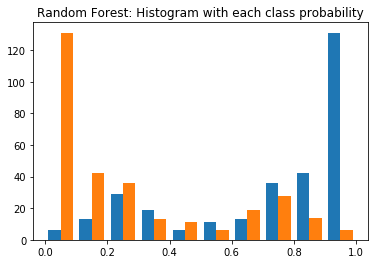

In [0]:
plt.hist(pro, bins=10)  # arguments are passed to np.histogram
plt.title("Random Forest: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_1=[]
for i in pro:
    pro_1.append(i[0])

In [12]:
hist_1=np.histogram(pro_1, bins =[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
hist_1

(array([  6,  13,  27,  22,   5,  14,  11,  32,  47, 129]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

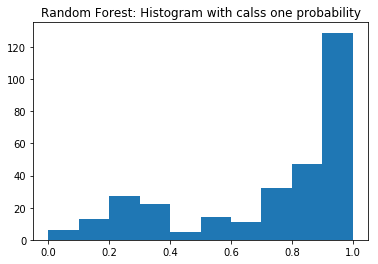

In [13]:
plt.hist(pro_1, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
plt.title("Random Forest: Histogram with calss one probability")
plt.show()

In [25]:
#calculate the number of class1 and class2 after binning
class_1=0
for i in pro_1:
  if i>0.5:
    class_1=class_1+1

print("---class distribution after random forest disllation---")
print('class 1: ',class_1)
class_2=len(pro_1)-class_1
print('class_2: ',class_2)

---after random forest disllation---
class 1:  233
class_2:  73


In [22]:
#new dataset
new_y=[]
new_X=X
for i in pro:
    for j in range(11): 
        if not j==10:
            if i[0]>hist_1[1][j] and i[0]<=hist_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                class_value=j+1  
                #print(class_value)
                new_y.append(class_value)
new_y=np.array(new_y)
new_y

array([10, 10, 10, 10, 10, 10, 10, 10,  4,  9, 10, 10,  9, 10,  9, 10, 10,
       10, 10, 10, 10, 10,  9, 10,  3, 10, 10, 10, 10, 10,  8,  7, 10,  9,
        4,  9,  8, 10, 10, 10,  8, 10, 10,  3,  6,  4, 10,  9,  9,  6,  8,
        9,  9,  3,  4,  9,  9,  8, 10,  5,  9, 10,  2,  4,  8,  8,  8, 10,
       10,  9, 10,  9,  9,  4,  2,  4, 10, 10, 10,  9,  2,  4,  4, 10,  9,
        3, 10, 10,  4,  3,  3,  3,  1, 10,  8,  9,  2, 10,  4, 10,  8,  9,
       10,  8,  9,  9,  8,  1,  1,  3,  7,  9, 10, 10,  4,  3, 10, 10, 10,
       10, 10,  9, 10,  7,  2, 10,  7,  9, 10, 10, 10,  7, 10, 10,  6, 10,
        1,  2,  8,  7,  9, 10,  6,  3,  4,  4, 10,  9, 10,  8,  8, 10, 10,
       10,  9, 10,  7,  8,  2,  3,  2,  3, 10, 10,  8, 10, 10,  1,  2,  4,
        3,  5,  8, 10,  8, 10,  8,  2, 10, 10,  3,  3, 10, 10, 10,  8, 10,
        6,  9,  9,  3,  8, 10, 10,  9, 10, 10,  4,  4,  4,  7, 10, 10, 10,
       10, 10, 10, 10,  9,  9, 10, 10, 10,  9,  9,  2, 10, 10,  6,  9, 10,
        8, 10,  1,  6,  9

In [23]:
print(new_X.shape)
print(new_y.shape)

(306, 3)
(306,)


In [78]:
#Decision Tree with distillation
#split data into 70% training and 30% testing set
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( new_X, new_y, test_size = 0.3, random_state = 100)

#Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

start_dt = time.clock()

clf_dt=DecisionTreeClassifier()
clf_dt.fit(X_new_train, y_new_train)
y_new_pred = clf_dt.predict(X_new_test)
#y_new_pred

end_dt=time.clock()

print('----Descision Tree, with distillation------')
print("time: ",end_dt-start_dt)
print("Accuracy: ", metrics.accuracy_score(y_new_test,y_new_pred))

#CV Score, with distillation
#score=cross_val_score(clf_dt, X_new_train, y_new_train, cv=5)
print('cv_score: ',cross_val_score(clf_dt, X_new_train, y_new_train, cv=5).mean())

----Descision Tree, with distillation------
time:  0.0043659999999974275
Accuracy:  0.4673913043478261
cv_score:  0.47585457543927545


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [80]:
#pruning parameters with GridSearch
from sklearn.model_selection import GridSearchCV #Import GridSearchCV
#Decision Tree

#pruning with Grid search CV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [ 1,3,5,7,9,20],
'min_samples_split': [2,3, 4, 5],
'min_impurity_decrease': [0.01 , 0.012,0.004 , 0.008],
'min_samples_leaf':[2,5,6,8,10]
}

# Instantiate a 5-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=clf_dt,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_new_train, y_new_train)
#Extracting the best hyperparameters
#Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('----Descision Tree, with distillation, with pruning------')
print('Best hyerparameters: ', best_hyperparams)
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy: ',format(best_CV_score))
#Extracting the best estimator
#Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
#Evaluate test set accuracy
test_acc = best_model.score(X_new_test,y_new_test)
#Print test set accuracy
print("Accuracy of best model: ",format(test_acc))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


----Descision Tree, with distillation, with pruning------
Best hyerparameters:  {'max_depth': 5, 'min_impurity_decrease': 0.004, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best CV accuracy:  0.514018691588785
Accuracy of best model:  0.3695652173913043


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [81]:
#Decision Tree without the distillation 
start_dt_no_distill = time.clock()

clf_dt_no_distil=DecisionTreeClassifier()
clf_dt_no_distil.fit(X_train,y_train)
y_pred_no_distil=clf_dt_no_distil.predict(X_test)

end_dt_no_distill = time.clock()

print('-------Decision Tree, without distillation--------')
print('time: ', end_dt_no_distill-start_dt_no_distill)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_no_distil))
#CV Score
#score=cross_val_score(clf_dt_no_distil, X_train, y_train, cv=5)
print('cv_score: ',cross_val_score(clf_dt_no_distil, X_train, y_train, cv=5).mean())

-------Decision Tree, without distillation--------
time:  0.0047580000000024825
Accuracy:  0.6304347826086957
cv_score:  0.6396808617738851


In [0]:
#Suppoort Vector Machine (SVM) Classification
#Import svm model
from sklearn import svm
#Generating model
#create a linear svm classifer 
clf_svm_lr=svm.SVC(kernel='linear',probability=True) #Linear Kernel
#Train the model using the training sets
clf_svm_lr.fit(X_train,y_train)
#Predicting for test dataset
y_pred_svm_lr = clf_svm_lr.predict(X_test)

In [29]:
#probability
pro_svm=clf_svm_lr.predict_proba(X)
pro_svm

array([[0.7886826 , 0.2113174 ],
       [0.76338959, 0.23661041],
       [0.80056467, 0.19943533],
       [0.77097925, 0.22902075],
       [0.75310975, 0.24689025],
       [0.65625411, 0.34374589],
       [0.79249378, 0.20750622],
       [0.79040102, 0.20959898],
       [0.68266733, 0.31733267],
       [0.33474957, 0.66525043],
       [0.78010642, 0.21989358],
       [0.65856076, 0.34143924],
       [0.71214471, 0.28785529],
       [0.79137404, 0.20862596],
       [0.61664894, 0.38335106],
       [0.7931605 , 0.2068395 ],
       [0.77776611, 0.22223389],
       [0.79779787, 0.20220213],
       [0.78798817, 0.21201183],
       [0.79092189, 0.20907811],
       [0.7860157 , 0.2139843 ],
       [0.71203952, 0.28796048],
       [0.57635163, 0.42364837],
       [0.79092189, 0.20907811],
       [0.48830889, 0.51169111],
       [0.76247189, 0.23752811],
       [0.78685066, 0.21314934],
       [0.78685066, 0.21314934],
       [0.75342974, 0.24657026],
       [0.77947989, 0.22052011],
       [0.

In [53]:
hist_svm=np.histogram(pro_svm, bins=[0,0.4,0.50,0.62,0.67,0.7,0.72,0.73,0.74,0.76,1])
hist_svm

(array([279,  25,  35,  18,  13,  16,   8,  18,  69, 131]),
 array([0.  , 0.4 , 0.5 , 0.62, 0.67, 0.7 , 0.72, 0.73, 0.74, 0.76, 1.  ]))

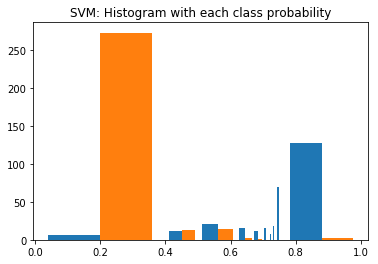

In [52]:
plt.hist(pro_svm, bins=[0,0.4,0.50,0.62,0.67,0.7,0.72,0.73,0.74,0.76,1])  # arguments are passed to np.histogram
plt.title("SVM: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_svm_1=[]
for i in pro_svm:
    pro_svm_1.append(i[0])

In [55]:
hist_svm_1=np.histogram(pro_svm_1, bins =[0,0.4,0.50,0.62,0.67,0.7,0.72,0.73,0.74,0.76,1])
hist_svm_1

(array([  6,  12,  21,  16,  12,  16,   8,  18,  69, 128]),
 array([0.  , 0.4 , 0.5 , 0.62, 0.67, 0.7 , 0.72, 0.73, 0.74, 0.76, 1.  ]))

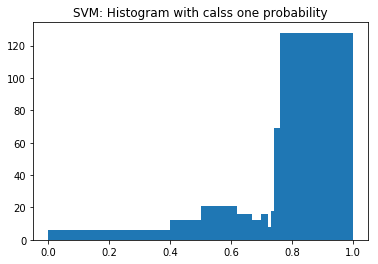

In [56]:
plt.hist(pro_svm_1, bins=[0,0.4,0.50,0.62,0.67,0.7,0.72,0.73,0.74,0.76,1])
plt.title("SVM: Histogram with calss one probability")
plt.show()

In [68]:
#calculate the number of class1 and class2 after binning
class_svm_1=0
for i in pro_svm_1:
  if i>0.5:
    class_svm_1=class_svm_1+1

print("---class distribution after SVM disllation---")
print('class 1: ',class_svm_1)
class_svm_2=len(pro_svm_1)-class_svm_1
print('class_2: ',class_svm_2)

---class distribution after SVM disllation---
class 1:  286
class_2:  20


In [58]:
#new dataset
new_svm_y=[]
new_svm_X=X
for i in pro_svm:
    for j in range(11): 
        if not j==10:
            if i[0]>hist_svm_1[1][j] and i[0]<=hist_svm_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                class_svm_value=j+1  
                #print(class_value)
                new_svm_y.append(class_svm_value)
new_svm_y=np.array(new_y)
new_svm_y

array([10, 10, 10, 10, 10, 10, 10, 10,  4,  9, 10, 10,  9, 10,  9, 10, 10,
       10, 10, 10, 10, 10,  9, 10,  3, 10, 10, 10, 10, 10,  8,  7, 10,  9,
        4,  9,  8, 10, 10, 10,  8, 10, 10,  3,  6,  4, 10,  9,  9,  6,  8,
        9,  9,  3,  4,  9,  9,  8, 10,  5,  9, 10,  2,  4,  8,  8,  8, 10,
       10,  9, 10,  9,  9,  4,  2,  4, 10, 10, 10,  9,  2,  4,  4, 10,  9,
        3, 10, 10,  4,  3,  3,  3,  1, 10,  8,  9,  2, 10,  4, 10,  8,  9,
       10,  8,  9,  9,  8,  1,  1,  3,  7,  9, 10, 10,  4,  3, 10, 10, 10,
       10, 10,  9, 10,  7,  2, 10,  7,  9, 10, 10, 10,  7, 10, 10,  6, 10,
        1,  2,  8,  7,  9, 10,  6,  3,  4,  4, 10,  9, 10,  8,  8, 10, 10,
       10,  9, 10,  7,  8,  2,  3,  2,  3, 10, 10,  8, 10, 10,  1,  2,  4,
        3,  5,  8, 10,  8, 10,  8,  2, 10, 10,  3,  3, 10, 10, 10,  8, 10,
        6,  9,  9,  3,  8, 10, 10,  9, 10, 10,  4,  4,  4,  7, 10, 10, 10,
       10, 10, 10, 10,  9,  9, 10, 10, 10,  9,  9,  2, 10, 10,  6,  9, 10,
        8, 10,  1,  6,  9

In [59]:
print(new_svm_X.shape)
print(new_svm_y.shape)

(306, 3)
(306,)


In [83]:
#Decision Tree, Suppoort Vector Machine (SVM) distillation
#split data into 70% training and 30% testing set
X_svm_new_train, X_svm_new_test, y_svm_new_train, y_svm_new_test = train_test_split( new_svm_X, new_svm_y, test_size = 0.3, random_state = 100)

#create a svm classifer 
strat_svm=time.clock()
clf_svm_dt=DecisionTreeClassifier()
#Train the model using the training sets
clf_svm_dt.fit(X_svm_new_train, y_svm_new_train)
#Predicting for test dataset
y_pred_svm = clf_svm_dt.predict(X_svm_new_test)
end_svm=time.clock()
print('---Decision Tree, Suppoort Vector Machine (SVM) distillation-----')
print('time: ',end_svm-strat_svm)
#Evaluating
#Model Accuracy
print("Accuracy: ",metrics.accuracy_score(y_svm_new_test, y_pred_svm))
#score_svm=cross_val_score(clf_svm, X_svm_new_train, y_svm_new_train, cv=5)
print('cv_score: ',cross_val_score(clf_svm_dt, X_svm_new_train, y_svm_new_train, cv=5).mean())

---Decision Tree, Suppoort Vector Machine (SVM) distillation-----
time:  0.004712000000001382
Accuracy:  0.44565217391304346
cv_score:  0.47251401438335766


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [61]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
strat_nb=time.clock()
clf_nb = clf = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
#probability
pro_nb=clf_nb.predict_proba(X)
pro_nb

array([[9.00103434e-01, 9.98965663e-02],
       [8.87481821e-01, 1.12518179e-01],
       [9.02388536e-01, 9.76114637e-02],
       [8.74459033e-01, 1.25540967e-01],
       [8.84142486e-01, 1.15857514e-01],
       [7.11854566e-01, 2.88145434e-01],
       [8.79205029e-01, 1.20794971e-01],
       [8.69951934e-01, 1.30048066e-01],
       [7.91586161e-01, 2.08413839e-01],
       [1.40675150e-03, 9.98593249e-01],
       [8.74854346e-01, 1.25145654e-01],
       [7.40341955e-01, 2.59658045e-01],
       [8.36407445e-01, 1.63592555e-01],
       [8.76258436e-01, 1.23741564e-01],
       [6.14394108e-01, 3.85605892e-01],
       [8.85804713e-01, 1.14195287e-01],
       [8.68974867e-01, 1.31025133e-01],
       [8.82872126e-01, 1.17127874e-01],
       [8.67566935e-01, 1.32433065e-01],
       [8.80528020e-01, 1.19471980e-01],
       [8.52823840e-01, 1.47176160e-01],
       [8.12912118e-01, 1.87087882e-01],
       [4.38336793e-01, 5.61663207e-01],
       [8.80528020e-01, 1.19471980e-01],
       [1.025870

In [63]:
hist_nb=np.histogram(pro_nb, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8,0.85, 0.9, 1. ])
hist_nb

(array([ 15, 227,  41,  11,  12,  23,  41, 153,  74,  15]),
 array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.7 , 0.8 , 0.85, 0.9 , 1.  ]))

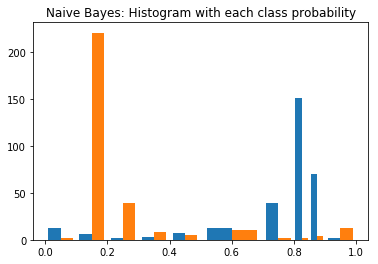

In [64]:
plt.hist(pro_nb, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8,0.85, 0.9, 1. ])  # arguments are passed to np.histogram
plt.title("Naive Bayes: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_nb_1=[]
for i in pro_nb:
    pro_nb_1.append(i[0])

In [66]:
hist_nb_1=np.histogram(pro_nb_1, bins =[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8,0.85, 0.9, 1. ])
hist_nb_1

(array([ 13,   6,   2,   3,   7,  13,  39, 151,  70,   2]),
 array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.7 , 0.8 , 0.85, 0.9 , 1.  ]))

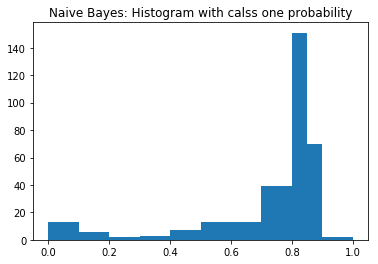

In [67]:
plt.hist(pro_nb_1, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8,0.85, 0.9, 1. ])
plt.title("Naive Bayes: Histogram with calss one probability")
plt.show()

In [70]:
#calculate the number of class1 and class2 after binning
class_nb_1=0
for i in pro_nb_1:
  if i>0.5:
    class_nb_1=class_nb_1+1

print("---class distribution after NBE disllation---")
print('class 1: ',class_nb_1)
class_nb_2=len(pro_nb_1)-class_nb_1
print('class_2: ',class_nb_2)

---class distribution after NBE disllation---
class 1:  275
class_2:  31


In [71]:
#new dataset
new_nb_y=[]
new_nb_X=X
for i in pro_nb:
    for j in range(11): 
        if not j==10:
            if i[0]>hist_nb_1[1][j] and i[0]<=hist_nb_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                class_nb_value=j+1  
                #print(class_value)
                new_nb_y.append(class_nb_value)
new_nb_y=np.array(new_y)
new_nb_y

array([10, 10, 10, 10, 10, 10, 10, 10,  4,  9, 10, 10,  9, 10,  9, 10, 10,
       10, 10, 10, 10, 10,  9, 10,  3, 10, 10, 10, 10, 10,  8,  7, 10,  9,
        4,  9,  8, 10, 10, 10,  8, 10, 10,  3,  6,  4, 10,  9,  9,  6,  8,
        9,  9,  3,  4,  9,  9,  8, 10,  5,  9, 10,  2,  4,  8,  8,  8, 10,
       10,  9, 10,  9,  9,  4,  2,  4, 10, 10, 10,  9,  2,  4,  4, 10,  9,
        3, 10, 10,  4,  3,  3,  3,  1, 10,  8,  9,  2, 10,  4, 10,  8,  9,
       10,  8,  9,  9,  8,  1,  1,  3,  7,  9, 10, 10,  4,  3, 10, 10, 10,
       10, 10,  9, 10,  7,  2, 10,  7,  9, 10, 10, 10,  7, 10, 10,  6, 10,
        1,  2,  8,  7,  9, 10,  6,  3,  4,  4, 10,  9, 10,  8,  8, 10, 10,
       10,  9, 10,  7,  8,  2,  3,  2,  3, 10, 10,  8, 10, 10,  1,  2,  4,
        3,  5,  8, 10,  8, 10,  8,  2, 10, 10,  3,  3, 10, 10, 10,  8, 10,
        6,  9,  9,  3,  8, 10, 10,  9, 10, 10,  4,  4,  4,  7, 10, 10, 10,
       10, 10, 10, 10,  9,  9, 10, 10, 10,  9,  9,  2, 10, 10,  6,  9, 10,
        8, 10,  1,  6,  9

In [72]:
print(new_nb_X.shape)
print(new_nb_y.shape)

(306, 3)
(306,)


In [82]:
# Descision Tree, with Naive Bayes Estimation distillation
#split data into 70% training and 30% testing set
X_nb_new_train, X_nb_new_test, y_nb_new_train, y_nb_new_test = train_test_split( new_nb_X, new_nb_y, test_size = 0.3, random_state = 100)

#create a svm classifer 
start_nb_distill=time.clock()
clf_nb_dt=DecisionTreeClassifier()
#Train the model using the training sets
clf_nb_dt.fit(X_nb_new_train, y_nb_new_train)
#Predicting for test dataset
y_pred_nb_distill = clf_nb.predict(X_nb_new_test)
end_nb_distill=time.clock()
print('---Descision Tree, with Naive Bayes Estimation distillation-----')
print('time: ',end_nb_distill-start_nb_distill)
#Evaluating
print("Accuracy: ",metrics.accuracy_score(y_nb_new_test, y_pred_nb_distill))
print('cv_score: ',cross_val_score(clf_nb, X_nb_new_train, y_nb_new_train, cv=5).mean())

---Descision Tree, with Naive Bayes Estimation distillation-----
time:  0.004791999999998353
Accuracy:  0.021739130434782608
cv_score:  0.2431588288349244


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
